In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, losses
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import Counter
print(tf.__version__)

2.1.0


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
num_classes = 10

In [3]:
### Data exploration ###
print('train_images.shape = ', train_images.shape)
print('train_labels.shape = ', train_labels.shape)
print('test_images.shape = ', test_images.shape)
print('test_labels.shape = ', test_labels.shape)

train_images.shape =  (50000, 32, 32, 3)
train_labels.shape =  (50000, 1)
test_images.shape =  (10000, 32, 32, 3)
test_labels.shape =  (10000, 1)


In [4]:
### Data exploration - outputs ###
set_labels = set(np.reshape(train_labels, (-1)))
train_count = Counter(np.reshape(train_labels, (-1)))
test_count = Counter(np.reshape(test_labels, (-1)))
print('labels = ', set_labels)
print('train_count = ', train_count)
print('test_count = ', test_count)

labels =  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
train_count =  Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})
test_count =  Counter({3: 1000, 8: 1000, 0: 1000, 6: 1000, 1: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 2: 1000})


In [5]:
### Converting to one-hot encoding ###
train_labels = np.array(tf.one_hot(train_labels, depth = num_classes))
test_labels = np.array(tf.one_hot(test_labels, depth = num_classes))

In [6]:
train_labels = np.reshape(train_labels, (-1, num_classes))
test_labels = np.reshape(test_labels, (-1, num_classes))
print('train_labels.shape = ', train_labels.shape)
print('test_labels.shape = ', test_labels.shape)
print('train_labels[0] = ', train_labels[0])

train_labels.shape =  (50000, 10)
test_labels.shape =  (10000, 10)
train_labels[0] =  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
### Data exploration - inputs ###
print(type(train_images[0]))
min_input_value = min(np.min(train_images), np.min(test_images))
max_input_value = max(np.max(train_images), np.max(test_images))
print('min_input_value = ', min_input_value)
print('max_input_value = ', max_input_value)

<class 'numpy.ndarray'>
min_input_value =  0
max_input_value =  255


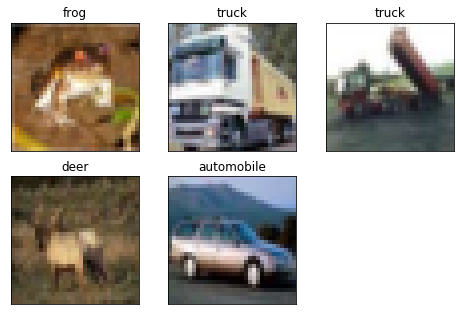

In [8]:
### Plotting a few images ###
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_examples(x, y = None, figsize = (8, 8)):
    
    ncols = math.ceil(len(x) ** (1/2))
    nrows = ncols
    plt.figure(figsize = figsize)
    
    for i in range(len(x)):
        ax = plt.subplot(nrows, ncols, i+1)
        plt.imshow(x[i])
        if y.any():
            plt.title(class_names[np.argmax(y[i])])
        plt.xticks([])
        plt.yticks([])
    

            
plot_examples(train_images[:5], train_labels[:5])

In [9]:
### Normalization ###
train_images = train_images / 255
test_images = test_images / 255

In [48]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape = (32, 32, 3), activation = 'relu'))#, data_format='channels_last'))
model.add(layers.Dropout(rate = 0.5))

#model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
#model.add(layers.Dropout(rate = 0.5))
model.add(layers.MaxPooling2D((2, 2)))

#model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.Dropout(rate = 0.5))

model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.Dropout(rate = 0.5))

model.add(layers.Flatten())
#model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dropout_30 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
dropout_31 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 12, 12, 32)      

In [49]:
### Checking so that dimensions are as expected ###
print(train_images[0:2].shape)
pred = model.predict(train_images[0:2])
print(pred.shape)
print(pred)

(2, 32, 32, 3)
(2, 10)
[[0.09053528 0.08901169 0.10155882 0.10627563 0.08407432 0.09269375
  0.11287179 0.13257332 0.08726028 0.10314509]
 [0.08533712 0.1007738  0.10290207 0.09219906 0.0758262  0.08704522
  0.12367179 0.14290643 0.0881872  0.10115112]]


In [50]:
### Choosing optimizer and compiling ###
opt = optimizers.Adam(learning_rate = 0.001)
loss_func = losses.CategoricalCrossentropy()
model.compile(opt, loss = loss_func, metrics = ['accuracy'])

In [51]:
### Training the model ###
batch_size = 32
num_epochs = 10

history = model.fit(train_images, 
                    train_labels,
                    batch_size = batch_size,
                    epochs = num_epochs,
                    validation_data = (test_images, test_labels)
                    )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 159s 3ms/sample - loss: 1.7902 - accuracy: 0.3482 - val_loss: 1.6463 - val_accuracy: 0.4245
Epoch 2/10
50000/50000 [==============================] - 158s 3ms/sample - loss: 1.4969 - accuracy: 0.4550 - val_loss: 1.9363 - val_accuracy: 0.3464
Epoch 3/10
50000/50000 [==============================] - 155s 3ms/sample - loss: 1.4068 - accuracy: 0.4943 - val_loss: 1.4145 - val_accuracy: 0.4956
Epoch 4/10
50000/50000 [==============================] - 157s 3ms/sample - loss: 1.3467 - accuracy: 0.5154 - val_loss: 1.5021 - val_accuracy: 0.4875
Epoch 5/10
50000/50000 [==============================] - 163s 3ms/sample - loss: 1.3021 - accuracy: 0.5348 - val_loss: 1.3761 - val_accuracy: 0.5230
Epoch 6/10
50000/50000 [==============================] - 154s 3ms/sample - loss: 1.2707 - accuracy: 0.5489 - val_loss: 1.5048 - val_accuracy: 0.4853
Epoch 7/10
50000/50000 [==========================

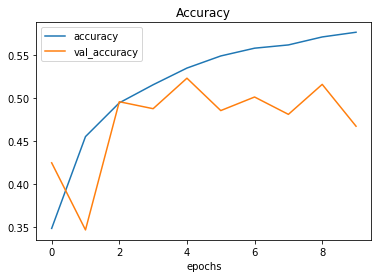

In [52]:
### Evaluating the model - accuracy ###
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

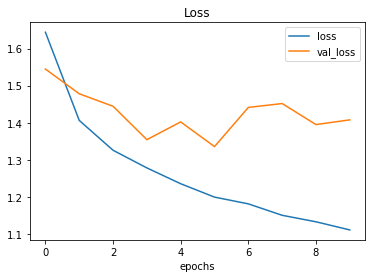

In [42]:
### Evaluating the model - loss ###
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
### Making some predictions ###
x = test_images[:50]
pred = model.predict(x)
plot_examples(x, pred, figsize = (15, 15))